# Third Modtran LibRadTran Models comparison
========================================================================

- author Sylvie Dagoret-Campagne
- date January 20th 2017



# 1) Packages
=========================

In [693]:
import rise
rise.__version__

'4.0.0b1'

In [694]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [695]:
import pandas as pd
import os
import re
import numpy as np

In [696]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [697]:
from scipy.interpolate import interp1d

In [698]:
import libLSSTMagnitude as magnit

## 2) Open Modtran Files
=============================

In [699]:
modtran_path="modtran_samples/MT_FirstSamples"

In [700]:
file1='Airmass.1.5.kg.1.17.7.diff.mm.xlsx'
file2='H2O.O3.Molec.Atmo1.0.1.5.2.0.kg.1.19.17.xlsx'
file3='O3.Molec.Scat.4.Sylvie.1.19.17.kg.xlsx'
file4='Pachon_MODTRAN.1.5.kg.1.6.17.xlsx'
file5='Atmo.1.5.H2O.O2.O3.Ray.xlsx'
file6='Atmo.1.5.H2O.O2.O3.Rey.1.27.17.xlsx'

### 2.1) File1 :  Airmass.1.5.kg.1.17.7.diff.mm.xlsx
---------------------------------------------------

- $z=1.5$
- $pwv= 5mm, 8mm, 11mm$

In [701]:
fullfile1=os.path.join(modtran_path,file1)
mtfile1 = pd.ExcelFile(fullfile1)
sheet_name=mtfile1.sheet_names[0]
df_colname1 = mtfile1.parse(sheet_name,index_row=0,usecols=range(0,4))
df1 = mtfile1.parse(sheet_name,header=1,usecols=range(0,4))
df1.columns = ["wl", "h2o_5mm","h2o_8mm","h2o_11mm"]

In [702]:
df1.head()

,wl,h2o_5mm,h2o_8mm,h2o_11mm
0,250.0,1.0,1.0,1.0
1,250.5,1.0,1.0,1.0
2,251.0,1.0,1.0,1.0
3,251.5,1.0,1.0,1.0
4,252.0,1.0,1.0,1.0


### 2.2 File 2 : H2O.O3.Molec.Atmo1.0.1.5.2.0.kg.1.19.17.xlsx
--------------------------------------------------------------

- file at airmass $z=1, 1.5, 2$
- H2O is 4mm
- O3 is 275 Db

In [703]:
fullfile2=os.path.join(modtran_path,file2)
mtfile2 = pd.ExcelFile(fullfile2)
sheet_name=mtfile2.sheet_names[0]
df_colname2 = mtfile2.parse(sheet_name,index_row=3,usecols=range(0,12))
df2 = mtfile2.parse(sheet_name,header=4,usecols=range(0,12))
df2.columns = ["wl", "z10_pwv4mm","z15_pwv4mm","z20_pwv4mm",
               "empty1",
               "z10_oz275","z15_oz275","z20_oz275", 
               "empty2",
               "z10_sc","z15_sc","z20_sc"]

In [704]:
df2.head()

,wl,z10_pwv4mm,z15_pwv4mm,z20_pwv4mm,empty1,z10_oz275,z15_oz275,z20_oz275,empty2,z10_sc,z15_sc,z20_sc
0,250.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1419,0.0536,0.0204
1,250.5,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1444,0.0550,0.0211
2,251.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1469,0.0565,0.0218
3,251.5,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1495,0.0580,0.0226
4,252.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN,0.1520,0.0594,0.0234


### 2.3)  File 3  : 'O3.Molec.Scat.4.Sylvie.1.19.17.kg.xlsx'
----------------------------------------------------------------------

In [705]:
fullfile3=os.path.join(modtran_path,file3)
mtfile3 = pd.ExcelFile(fullfile3)
sheet_name=mtfile3.sheet_names[0]
df_colname3 = mtfile3.parse(sheet_name,index_row=3,usecols=range(0,9))
df3 = mtfile3.parse(sheet_name,header=4,usecols=range(0,9))
df3.columns = ["wl","Empty1",
               "z10_oz275","z15_oz275","z20_oz275",
               "Empty2",
               "z10_sc","z15_sc","z20_sc"]

In [706]:
df3.head()

,wl,Empty1,z10_oz275,z15_oz275,z20_oz275,Empty2,z10_sc,z15_sc,z20_sc
0,250.0,NaN,0.0,0.0,0.0,NaN,0.1419,0.0536,0.0204
1,250.5,NaN,0.0,0.0,0.0,NaN,0.1444,0.0550,0.0211
2,251.0,NaN,0.0,0.0,0.0,NaN,0.1469,0.0565,0.0218
3,251.5,NaN,0.0,0.0,0.0,NaN,0.1495,0.0580,0.0226
4,252.0,NaN,0.0,0.0,0.0,NaN,0.1520,0.0594,0.0234


### 2.4) File 4 :  'Pachon_MODTRAN.1.5.kg.1.6.17.xlsx'

In [707]:
fullfile4=os.path.join(modtran_path,file4)
mtfile4 = pd.ExcelFile(fullfile4)
sheet_name=mtfile4.sheet_names[0]
df_colname4 = mtfile4.parse(sheet_name,index_row=0,usecols=range(0,6))
df4 = mtfile4.parse(sheet_name,header=16,usecols=range(0,6))
df4.columns = ["wl","z15_comb","z15_pwv","z15_O2","z15_oz","z15_sc"]

In [708]:
df4.head()

,wl,z15_comb,z15_pwv,z15_O2,z15_oz,z15_sc
0,250.0,0.0,1.0,0.1014,0.0,0.0536
1,250.5,0.0,1.0,0.1154,0.0,0.0550
2,251.0,0.0,1.0,0.1305,0.0,0.0565
3,251.5,0.0,1.0,0.1466,0.0,0.0580
4,252.0,0.0,1.0,0.1639,0.0,0.0594


## 2.5) File 5: Atmo.1.5.H2O.O2.O3.Ray.xlsx

In [709]:
fullfile5=os.path.join(modtran_path,file5)
mtfile5 = pd.ExcelFile(fullfile5)
sheet_name=mtfile5.sheet_names[0]
df_colname5 = mtfile5.parse(sheet_name,index_row=0,usecols=range(0,5))
df5 = mtfile5.parse(sheet_name,header=4,usecols=range(0,5))
df5.columns = ["wl","z15_pwv","z15_oz","z15_sc","z15_O2"]

In [710]:
df5.head()

,wl,z15_pwv,z15_oz,z15_sc,z15_O2
0,250.0,1.0,0.0,0.0960,0.1014
1,250.5,1.0,0.0,0.0981,0.1154
2,251.0,1.0,0.0,0.1001,0.1305
3,251.5,1.0,0.0,0.1022,0.1466
4,252.0,1.0,0.0,0.1043,0.1639


## 2.6) File 6 : Atmo.1.5.H2O.O2.O3.Rey.1.27.17.xlsx

In [711]:
fullfile6=os.path.join(modtran_path,file6)
mtfile6 = pd.ExcelFile(fullfile6)
sheet_name=mtfile6.sheet_names[0]
df_colname6 = mtfile6.parse(sheet_name,index_row=0,usecols=range(0,5))
df6 = mtfile6.parse(sheet_name,header=3,usecols=range(0,5))
df6.columns = ["wl","z15_pwv","z15_O2","z15_oz","z15_sc"]

In [712]:
df6.head()

,wl,z15_pwv,z15_O2,z15_oz,z15_sc
0,250.0,1.0,0.1014,0.0,0.0536
1,250.5,1.0,0.1154,0.0,0.0550
2,251.0,1.0,0.1305,0.0,0.0565
3,251.5,1.0,0.1466,0.0,0.0580
4,252.0,1.0,0.1639,0.0,0.0594


### Path to LibRadTran files for pure scattering atmosphere

In [713]:
path_atm_rt_us_sc="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sc/out"

### Path to LibRadTran for pure absorbing atmosphere

- pwv : warying water vapor
- oz  : varying ozone 

In [714]:
path_atm_rt_us_ab_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/oz/out'
path_atm_rt_us_ab_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/wv/out'

### Path to LibRadTran for scattering and absorbing atmosphere

- pwv : warying water vapor
- oz  : varying ozone 

In [715]:
path_atm_rt_us_sa_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/oz/out'
path_atm_rt_us_sa_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/wv/out'

## pure scattering file in input_filelist

In [716]:
# get the list of files
input_filelist=os.listdir(path_atm_rt_us_sc) 

In [717]:
if '.DS_Store' in input_filelist:
    input_filelist.remove('.DS_Store')
input_filelist=np.array(input_filelist)

In [718]:
input_filelist[:5]

array(['RT_LS_pp_us_sc_rt_z10.OUT', 'RT_LS_pp_us_sc_rt_z11.OUT',
       'RT_LS_pp_us_sc_rt_z12.OUT', 'RT_LS_pp_us_sc_rt_z13.OUT',
       'RT_LS_pp_us_sc_rt_z14.OUT'], 
      dtype='|S25')

In [719]:
NB_RTFILES=input_filelist.shape[0] # Number of files
fullfile=fullfilename=os.path.join(path_atm_rt_us_sc,input_filelist[0])
data=np.loadtxt(fullfile)
NB_WL=data.shape[0]  # number of wavelength

In [720]:
rt_airmasses=np.zeros(NB_RTFILES)
rt_data_list = []
rt_trans = np.zeros([NB_WL,NB_RTFILES])
rt_wl=np.zeros([NB_WL,NB_RTFILES])

for idx,file in np.ndenumerate(input_filelist):
    str_airmass=re.findall('^RT_LS_pp_us_sc_rt_z(.*).OUT',file)[0] # decode airmass from filename
    fullfilename=os.path.join(path_atm_rt_us_sc,file)
    data=np.loadtxt(fullfilename) # read data from file
    rt_data_list.append(data)   # save data
    rt_wl[:,idx[0]]=data[:,0]
    rt_trans[:,idx[0]]=data[:,1]
    rt_airmasses[idx[0]]=float(str_airmass)/10.

### Airmasses
----------------

In [721]:
rt_airmasses

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ])

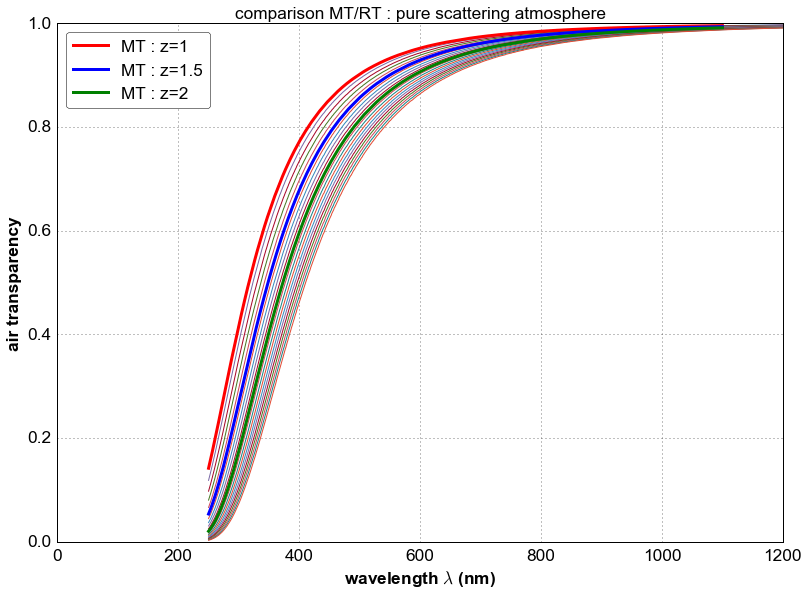

In [722]:
for idx,file in np.ndenumerate(input_filelist):
    index=idx[0] ; airmass=rt_airmasses[index]
    thelegend="z={:3.1f}".format(airmass)
    x=rt_wl[:,index] ; y=rt_trans[:,index]
    #plt.plot(x,y,label=thelegend)
    plt.plot(x,y)
    
    
    x_mt_1=df2["wl"]
    y_mt_1=df2["z10_sc"]
    x_mt_2=df2["wl"]
    y_mt_2=df2["z15_sc"]
    x_mt_3=df2["wl"]
    y_mt_3=df2["z20_sc"]
    
    x_mt_4=df6["wl"]
    y_mt_4=df6["z15_sc"]

    
plt.plot(x_mt_1,y_mt_1,'r-',lw=3,label="MT : z=1")
plt.plot(x_mt_2,y_mt_2,'b-',lw=3,label="MT : z=1.5")
plt.plot(x_mt_3,y_mt_3,'g-',lw=3,label="MT : z=2")
#plt.plot(x_mt_4,y_mt_4,'k-',lw=3,label="MT : z=1.5")

plt.xlim(0,1200.)
plt.title("comparison MT/RT : pure scattering atmosphere")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency")
plt.legend(loc=2)

Here above, we have plotted as fine lines, the air transparency for scattering only in LibRadTan.
The Thich line is ModTran.
We see the equivalent airmass depth is for $z=1.5$ for LibRadTran

### Get the same X-points for LibRadTran and Modtran by interpolation

In [723]:
# range of wavelength in Modtran
WLMIN1=x_mt_1.min()
WLMAX1=x_mt_1.max()
WLMIN2=x_mt_2.min()
WLMAX2=x_mt_2.max()
WLMIN3=x_mt_3.min()
WLMAX3=x_mt_3.max()
WLMIN=max([WLMIN1,WLMIN2,WLMIN3])
WLMAX=min([WLMAX1,WLMAX2,WLMAX3])

### Interpolation of pure scattering

In [724]:
interpol_atm_mt1=interp1d(x_mt_1,y_mt_1)
interpol_atm_mt2=interp1d(x_mt_2,y_mt_2)
interpol_atm_mt3=interp1d(x_mt_3,y_mt_3)

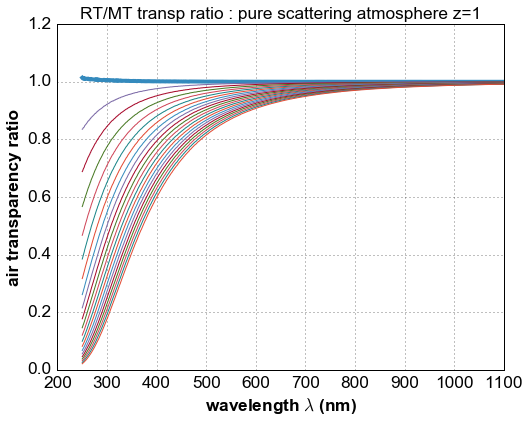

In [725]:
plt.figure(figsize=(8,6))
for idx,file in np.ndenumerate(input_filelist):
    index=idx[0] ; airmass=rt_airmasses[index]
    thelegend="z={:3.1f}".format(airmass)
    x=rt_wl[:,index] ; y=rt_trans[:,index]
    indexes=np.where(np.logical_and(x>=WLMIN,x<=WLMAX))
    
    newx=x[indexes] ; newy=y[indexes] ; newymt=interpol_atm_mt1(newx)
    ratio=newy/newymt
    if airmass==1:
        plt.plot(newx,ratio,label=thelegend,lw=4)
    else:
        plt.plot(newx,ratio,label=thelegend,lw=1)
plt.title("RT/MT transp ratio : pure scattering atmosphere z=1")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
#plt.legend(loc=1)

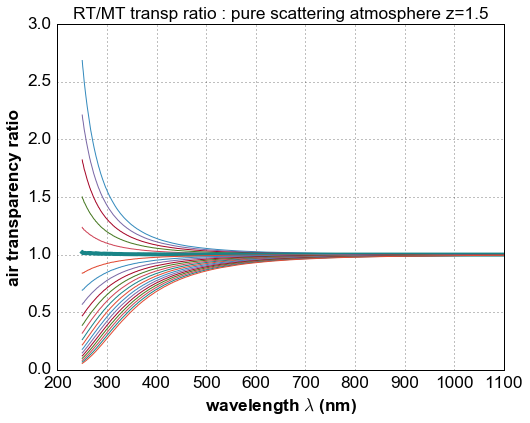

In [726]:
plt.figure(figsize=(8,6))
for idx,file in np.ndenumerate(input_filelist):
    index=idx[0] ; airmass=rt_airmasses[index]
    thelegend="z={:3.1f}".format(airmass)
    x=rt_wl[:,index] ; y=rt_trans[:,index]
    indexes=np.where(np.logical_and(x>=WLMIN,x<=WLMAX))
    
    newx=x[indexes] ; newy=y[indexes] ; newymt=interpol_atm_mt2(newx)
    ratio=newy/newymt
    if airmass==1.5:
        plt.plot(newx,ratio,label=thelegend,lw=4)
    else:
        plt.plot(newx,ratio,label=thelegend,lw=1)
plt.title("RT/MT transp ratio : pure scattering atmosphere z=1.5")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
#plt.legend(loc=1)

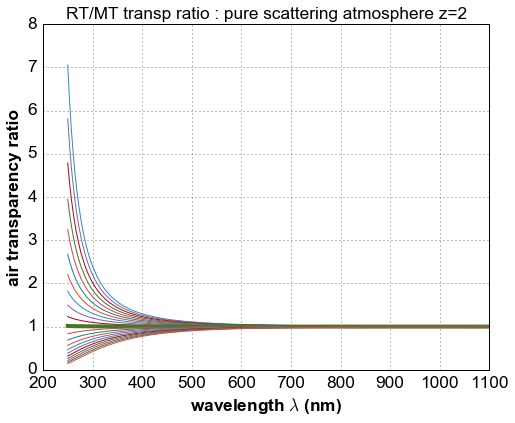

In [727]:
plt.figure(figsize=(8,6))
for idx,file in np.ndenumerate(input_filelist):
    index=idx[0] ; airmass=rt_airmasses[index]
    thelegend="z={:3.1f}".format(airmass)
    x=rt_wl[:,index] ; y=rt_trans[:,index]
    indexes=np.where(np.logical_and(x>=WLMIN,x<=WLMAX))
    
    newx=x[indexes] ; newy=y[indexes] ; newymt=interpol_atm_mt3(newx)
    ratio=newy/newymt
    if airmass==2:
        plt.plot(newx,ratio,label=thelegend,lw=4)
    else:
        plt.plot(newx,ratio,label=thelegend,lw=1)
plt.title("RT/MT transp ratio : pure scattering atmosphere z=2")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
#plt.legend(loc=1)

Here above, we have plotted as fine lines, the air transparency ratio Modtran/LibRadTran for scattering only in LibRadTan.
The legend indicate the airmass in LibRadTran
We see the equivalent airmass depth is for $z=1.2$ for LibRadTran

## For MT/RT Comparison, need to select airmass z=1.5 in libradtran to have same atmospheric depth

## 4) Pure Absorbing atmosphere for Water Vapor
==============================================================

In [728]:
# get the list of files
input_filelist=os.listdir(path_atm_rt_us_ab_rt_pwv) 

In [729]:
if '.DS_Store' in input_filelist:
    input_filelist.remove('.DS_Store')
input_filelist=np.array(input_filelist)

In [730]:
input_filelist[:5]

array(['RT_LS_pp_us_ab_rt_z10_wv0.OUT', 'RT_LS_pp_us_ab_rt_z10_wv10.OUT',
       'RT_LS_pp_us_ab_rt_z10_wv100.OUT',
       'RT_LS_pp_us_ab_rt_z10_wv105.OUT', 'RT_LS_pp_us_ab_rt_z10_wv110.OUT'], 
      dtype='|S31')

### Select the good airmass according the filename

In [731]:
input_filelist2 = []

In [732]:
for file in input_filelist:
    if re.search("^RT_LS_pp_us_ab_rt_z15_",file): # regular expression from filename
        input_filelist2.append(file)
input_filelist2=np.array(input_filelist2)

In [733]:
input_filelist2

array(['RT_LS_pp_us_ab_rt_z15_wv0.OUT', 'RT_LS_pp_us_ab_rt_z15_wv10.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv100.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv105.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv110.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv115.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv120.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv125.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv130.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv135.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv140.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv145.OUT', 'RT_LS_pp_us_ab_rt_z15_wv15.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv150.OUT', 'RT_LS_pp_us_ab_rt_z15_wv20.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv25.OUT', 'RT_LS_pp_us_ab_rt_z15_wv30.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv35.OUT', 'RT_LS_pp_us_ab_rt_z15_wv40.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv45.OUT', 'RT_LS_pp_us_ab_rt_z15_wv5.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv50.OUT', 'RT_LS_pp_us_ab_rt_z15_wv55.OUT',
       'RT_LS_pp_us_ab_rt_z15_wv60.OUT', 'RT_LS_pp_us_ab_rt_z15_wv65.OUT',
       'RT_LS_pp_us_ab

In [734]:
NB_RTFILES=input_filelist2.shape[0] # Number of files
fullfile=fullfilename=os.path.join(path_atm_rt_us_ab_rt_pwv,input_filelist2[0])
data=np.loadtxt(fullfile)
NB_WL=data.shape[0]  # number of wavelength

In [735]:
rt_trans = np.zeros([NB_WL,NB_RTFILES])
rt_wl=np.zeros([NB_WL,NB_RTFILES])
rt_pwv=np.zeros(NB_RTFILES)

for idx,file in np.ndenumerate(input_filelist2):
    str_pwv=re.findall('^RT_LS_pp_us_ab_rt_z15_wv(.*).OUT',file)[0] # decode pwv from filename
    fullfilename=os.path.join(path_atm_rt_us_ab_rt_pwv,file)
    data=np.loadtxt(fullfilename) # read data from file
    rt_data_list.append(data)   # save data
    rt_wl[:,idx[0]]=data[:,0]
    rt_trans[:,idx[0]]=data[:,1]
    rt_pwv[idx[0]]=float(str_pwv)/10.
    

In [736]:
WLMIN=700 # avoid ozone region because there is no ozone in Modtran
WLMAX=1100

In [737]:
x_mt=df6["wl"]
y_mt=df6["z15_pwv"]

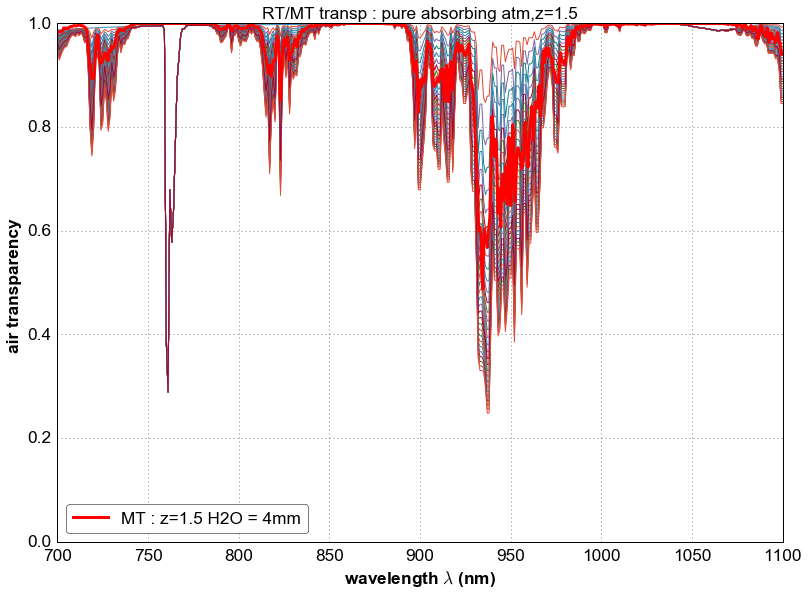

In [738]:
for index in np.arange(NB_RTFILES):
    plt.plot(rt_wl[:,index],rt_trans[:,index],'-',lw=1 ) 
plt.xlim(WLMIN,WLMAX)
plt.plot(x_mt,y_mt,'r-',lw=3,label='MT : z=1.5 H2O = 4mm')
plt.title("RT/MT transp : pure absorbing atm,z=1.5")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ")
plt.legend(loc='best')

In [739]:
interpol_atm_mt=interp1d(x_mt,y_mt)

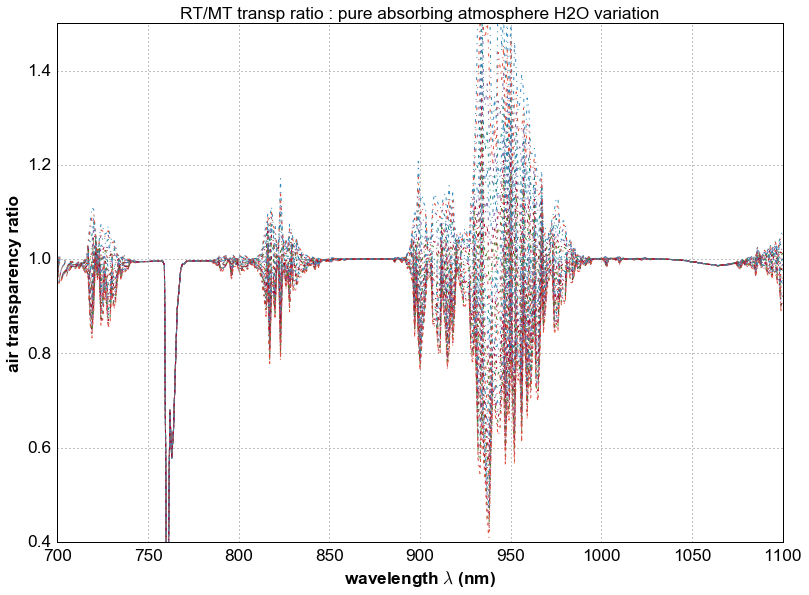

In [740]:
for index in np.arange(NB_RTFILES):    
    x=rt_wl[:,index] ; y=rt_trans[:,index]
    indexes=np.where(np.logical_and(x>=WLMIN,x<=WLMAX))
    newx=x[indexes] ; newy=y[indexes] ; # LibRadTran
    newymt=interpol_atm_mt(newx) # Modtran interpolated 
    ratio=newy/newymt
    plt.plot(newx,ratio,"-.")
    plt.title("RT/MT transp ratio : pure absorbing atmosphere H2O variation")
    plt.xlabel("wavelength $\lambda$ (nm)")
    plt.ylabel("air transparency ratio")
    plt.ylim(0.40,1.50)

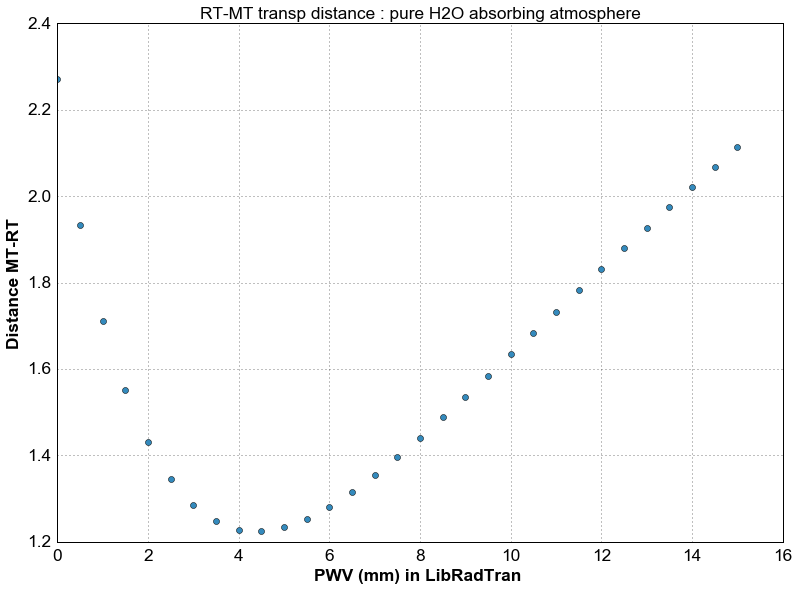

In [741]:
XX=[] ; YY=[]
for index in np.arange(NB_RTFILES):    
    x=rt_wl[:,index] ; y=rt_trans[:,index]
    
    indexes=np.where(np.logical_and(x>=WLMIN,x<=WLMAX))
    newx=x[indexes] ; newy=y[indexes] ; # Libradtran 
    newymt=interpol_atm_mt(newx)      # Modtran
    diff2=(newy-newymt)**2 ; thesum=np.sum(diff2)
    XX.append(rt_pwv[index]) ; YY.append(np.sqrt(thesum))
    
XX=np.array(XX) ; YY=np.array(YY)
plt.plot(XX,YY,"o")
plt.title("RT-MT transp distance : pure H2O absorbing atmosphere")
plt.xlabel("PWV (mm) in LibRadTran ")
plt.ylabel("Distance MT-RT")

In [742]:
index_min=np.where(YY==YY.min())[0]

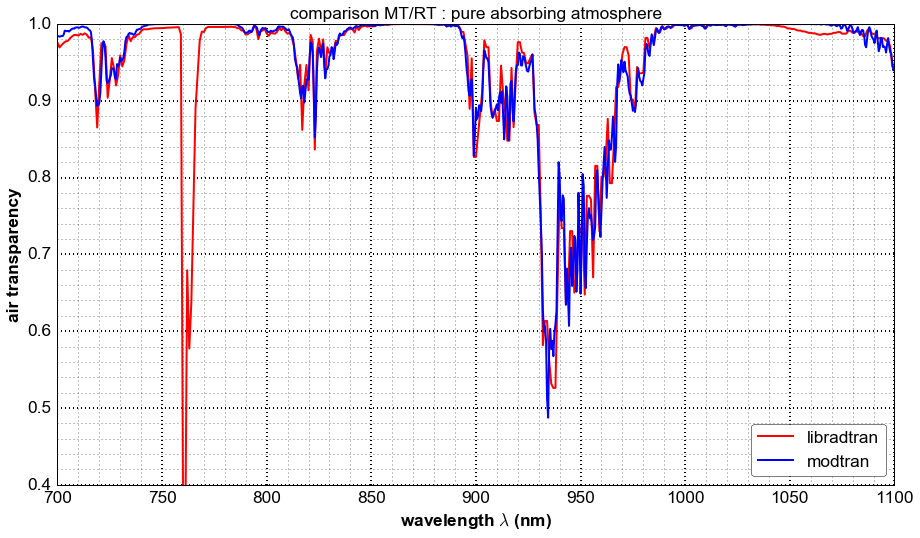

In [743]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
x=rt_wl[:,index_min] ; y=rt_trans[:,index_min]
ax.plot(x,y,'r-',lw=2,label='libradtran'); ax.plot(x_mt,y_mt,'b-',lw=2,label='modtran')
ax.set_title("comparison MT/RT : pure absorbing atmosphere")
ax.set_xlabel("wavelength $\lambda$ (nm)") ; ax.set_ylabel("air transparency")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.set_ylim(0.4,1)
ax.set_xlim(WLMIN,WLMAX)
ax.legend(loc='best')

### Precipitable water vapor in LibRadTran

In [744]:
rt_index_h2o5mm=np.where(rt_pwv==5.)[0]
rt_index_h2o8mm=np.where(rt_pwv==8.)[0]
rt_index_h2o11mm=np.where(rt_pwv==11.)[0]

#### Compare H2O MT/RT using file1

In [745]:
x_mt=df1["wl"]
y_mt_h2o5mm=df1["h2o_5mm"]
y_mt_h2o8mm=df1["h2o_8mm"]
y_mt_h2o11mm=df1["h2o_11mm"]

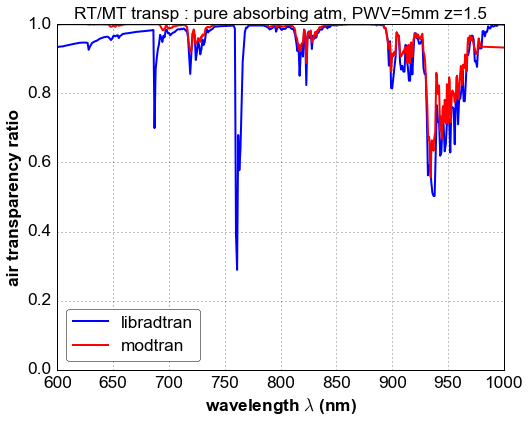

In [746]:
plt.figure(figsize=(8,6))
x=x=rt_wl[:,rt_index_h2o5mm] ; y=rt_trans[:,rt_index_h2o5mm]
plt.plot(x,y,'b-',label='libradtran',lw=2) 
plt.plot(x_mt,y_mt_h2o5mm,'r-',label='modtran',lw=2)
plt.xlim(600.,1000.)
plt.title("RT/MT transp : pure absorbing atm, PWV=5mm z=1.5")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
plt.legend(loc='best')

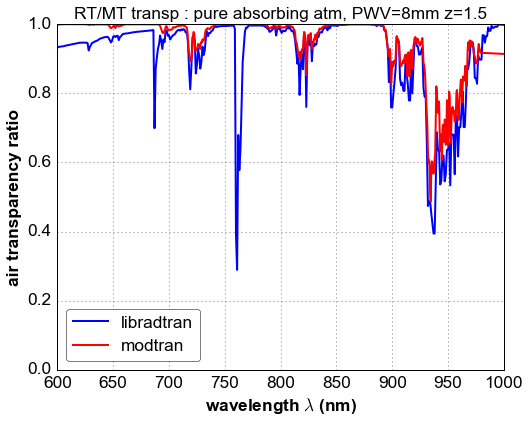

In [747]:
plt.figure(figsize=(8,6))
x=x=rt_wl[:,rt_index_h2o8mm] ; y=rt_trans[:,rt_index_h2o8mm]
plt.plot(x,y,'b-',label='libradtran',lw=2) 
plt.plot(x_mt,y_mt_h2o8mm,'r-',label='modtran',lw=2)
plt.xlim(600.,1000.)
plt.title("RT/MT transp : pure absorbing atm, PWV=8mm z=1.5")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
plt.legend(loc='best')

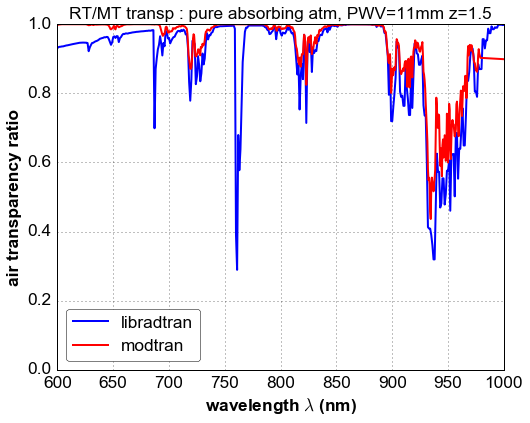

In [748]:
plt.figure(figsize=(8,6))
x=x=rt_wl[:,rt_index_h2o11mm] ; y=rt_trans[:,rt_index_h2o11mm]
plt.plot(x,y,'b-',label='libradtran',lw=2) 
plt.plot(x_mt,y_mt_h2o11mm,'r-',label='modtran',lw=2)
plt.xlim(600.,1000.)
plt.title("RT/MT transp : pure absorbing atm, PWV=11mm z=1.5")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
plt.legend(loc='best')

#### I suspect the file 1 has been generated with z=1 instead of z=1.5.

I have checked these absorption profile in Modtran is compatible with z=1.5 in libradtran

#### Compare H2O MT/RT using file2

In [749]:
# modtran
x_mt=df2["wl"]
y_mt_z10_pwv4mm=df2["z10_pwv4mm"]
y_mt_z15_pwv4mm=df2["z15_pwv4mm"]
y_mt_z20_pwv4mm=df2["z20_pwv4mm"]

In [750]:
rt_file_z10=os.path.join(path_atm_rt_us_ab_rt_pwv,'RT_LS_pp_us_ab_rt_z10_wv40.OUT')
rt_file_z15=os.path.join(path_atm_rt_us_ab_rt_pwv,'RT_LS_pp_us_ab_rt_z15_wv40.OUT')
rt_file_z20=os.path.join(path_atm_rt_us_ab_rt_pwv,'RT_LS_pp_us_ab_rt_z20_wv40.OUT')

In [751]:
rt_data_z10=np.loadtxt(rt_file_z10)
rt_data_z15=np.loadtxt(rt_file_z15)
rt_data_z20=np.loadtxt(rt_file_z20)

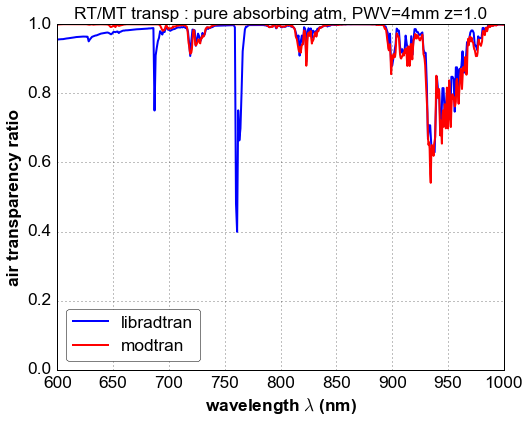

In [752]:
plt.figure(figsize=(8,6))
x=rt_data_z10[:,0] ; y=rt_data_z10[:,1]
plt.plot(x,y,'b-',label='libradtran',lw=2) 
plt.plot(x_mt,y_mt_z10_pwv4mm,'r-',label='modtran',lw=2)
plt.xlim(600.,1000.)
plt.title("RT/MT transp : pure absorbing atm, PWV=4mm z=1.0")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
plt.legend(loc='best')

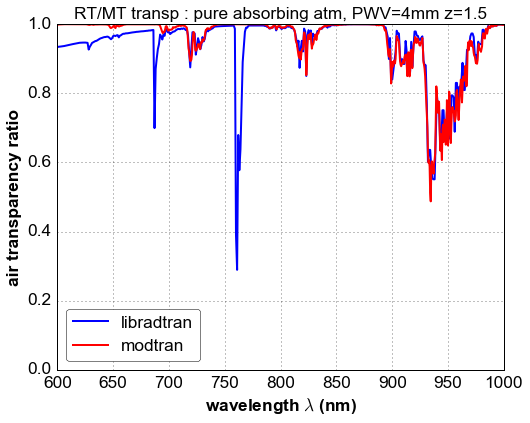

In [753]:
plt.figure(figsize=(8,6))
x=rt_data_z15[:,0] ; y=rt_data_z15[:,1]
plt.plot(x,y,'b-',label='libradtran',lw=2) 
plt.plot(x_mt,y_mt_z15_pwv4mm,'r-',label='modtran',lw=2)
plt.xlim(600.,1000.)
plt.title("RT/MT transp : pure absorbing atm, PWV=4mm z=1.5")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
plt.legend(loc='best')

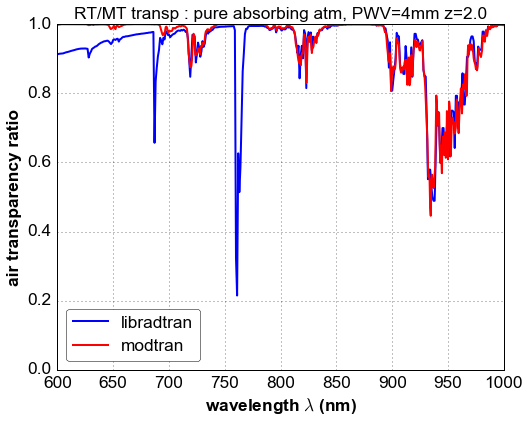

In [754]:
plt.figure(figsize=(8,6))
x=rt_data_z20[:,0] ; y=rt_data_z20[:,1]
plt.plot(x,y,'b-',label='libradtran',lw=2) 
plt.plot(x_mt,y_mt_z20_pwv4mm,'r-',label='modtran',lw=2)
plt.xlim(600.,1000.)
plt.title("RT/MT transp : pure absorbing atm, PWV=4mm z=2.0")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")
plt.legend(loc='best')

#### Conclusion on H2O:

- it is a good news, in file 2 MT and RT $H2O$ transparency profiles match perfectly.
- They don't match in file 1. So probably, the file 1 has not been generated at z=1.5, but z=1

## 5) PROBLEM WITH O2  ???
-------------------------------------


** So we can confirm this little discrepancy feature at 1% at 1065  nm **

$$
\lambda = 1065 nm
$$

In [755]:
# defines WL range where to compute the distance MT-RT
WLMINCutO2=750
WLMAXCutO2=780

In [756]:
x1=rt_data_z10[:,0] ; y1=rt_data_z10[:,1]
x2=rt_data_z15[:,0] ; y2=rt_data_z15[:,1]
x3=rt_data_z20[:,0] ; y3=rt_data_z20[:,1]

In [757]:
x_mt=df4["wl"]
y_mt=df4["z15_O2"]

x_mt2=df5["wl"]
y_mt2=df5["z15_O2"]

x_mt3=df6["wl"]
y_mt3=df6["z15_O2"]



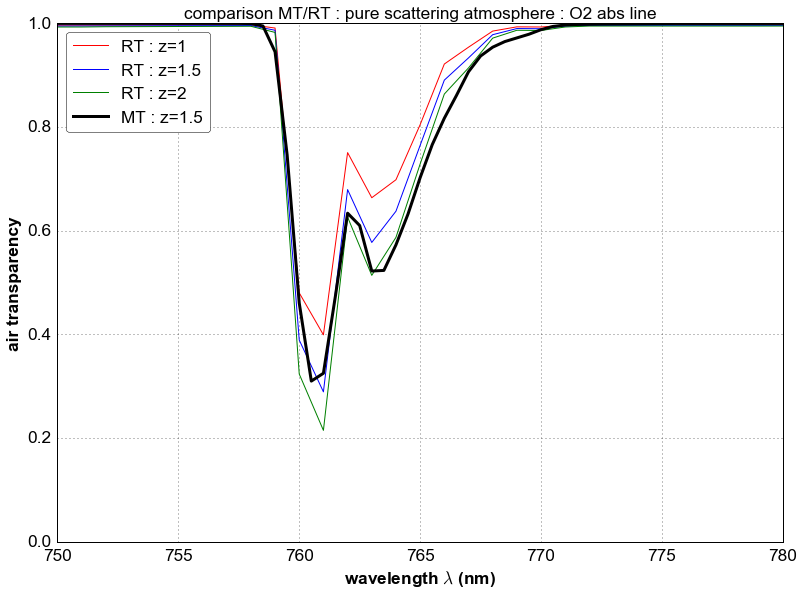

In [758]:

plt.plot(x1,y1,'r-',label='RT : z=1')
plt.plot(x2,y2,'b-',label='RT : z=1.5')
plt.plot(x3,y3,'g-',label='RT : z=2')
  
#plt.plot(x_mt,y_mt,'k-',label='MT : z=1.5',lw=3)  
plt.plot(x_mt3,y_mt3,'k-',label='MT : z=1.5',lw=3) 

plt.xlim(WLMINCutO2,WLMAXCutO2)
plt.title("comparison MT/RT : pure scattering atmosphere : O2 abs line")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
plt.legend(loc=2)

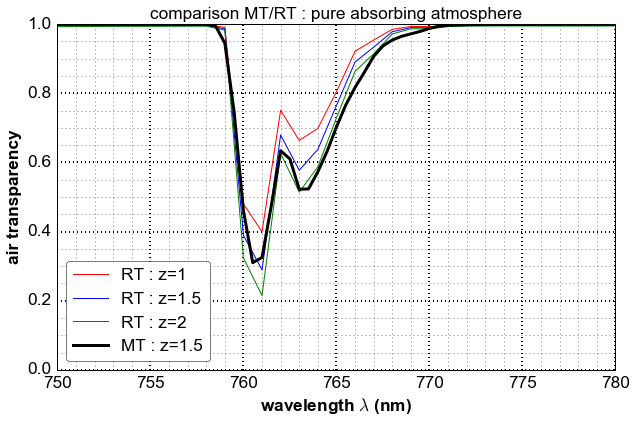

In [759]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.plot(x1,y1,'r-',label='RT : z=1')
ax.plot(x2,y2,'b-',label='RT : z=1.5')
ax.plot(x3,y3,'g-',label='RT : z=2')
  
#plt.plot(x_mt,y_mt,'k-',label='MT : z=1.5',lw=3)  
ax.plot(x_mt3,y_mt3,'k-',label='MT : z=1.5',lw=3) 

ax.set_xlim(WLMINCutO2,WLMAXCutO2)


ax.set_title("comparison MT/RT : pure absorbing atmosphere")
ax.set_xlabel("wavelength $\lambda$ (nm)")
ax.set_ylabel("air transparency")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
plt.xlim(WLMINCutO2,WLMAXCutO2)
ax.legend(loc='best')

In [760]:
# defines WL range where to compute the distance MT-RT
WLMINCutO2=750
WLMAXCutO2=780

## 6) Ozone

In [761]:
OZMIN=400
OZMAX=765

In [762]:
input_filelist=os.listdir(path_atm_rt_us_ab_rt_oz) 

In [763]:
input_filelist3=[]

In [764]:
for file in input_filelist:
    if re.search("^RT_LS_pp_us_ab_rt_z15_",file): # regular expression from filename
        input_filelist3.append(file)
input_filelist3=np.array(input_filelist3)

In [765]:
input_filelist3

array(['RT_LS_pp_us_ab_rt_z15_oz20.OUT', 'RT_LS_pp_us_ab_rt_z15_oz22.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz24.OUT', 'RT_LS_pp_us_ab_rt_z15_oz26.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz28.OUT', 'RT_LS_pp_us_ab_rt_z15_oz30.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz32.OUT', 'RT_LS_pp_us_ab_rt_z15_oz34.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz36.OUT', 'RT_LS_pp_us_ab_rt_z15_oz38.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz40.OUT', 'RT_LS_pp_us_ab_rt_z15_oz42.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz44.OUT', 'RT_LS_pp_us_ab_rt_z15_oz46.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz48.OUT', 'RT_LS_pp_us_ab_rt_z15_oz50.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz52.OUT', 'RT_LS_pp_us_ab_rt_z15_oz54.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz56.OUT', 'RT_LS_pp_us_ab_rt_z15_oz58.OUT',
       'RT_LS_pp_us_ab_rt_z15_oz60.OUT'], 
      dtype='|S30')

In [766]:
NB_RTFILES=input_filelist3.shape[0] # Number of files
fullfile=fullfilename=os.path.join(path_atm_rt_us_ab_rt_oz,input_filelist3[0])
data=np.loadtxt(fullfile)
NB_WL=data.shape[0]  # number of wavelength

In [767]:
fullfile

'/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/oz/out/RT_LS_pp_us_ab_rt_z15_oz20.OUT'

In [768]:
rt_trans = np.zeros([NB_WL,NB_RTFILES])
rt_wl=np.zeros([NB_WL,NB_RTFILES])
rt_oz=np.zeros(NB_RTFILES)
for idx,file in np.ndenumerate(input_filelist3):
    str_oz=re.findall('^RT_LS_pp_us_ab_rt_z15_oz(.*).OUT',file)[0] # decode pwv from filename
    fullfilename=os.path.join(path_atm_rt_us_ab_rt_oz,file)
    data=np.loadtxt(fullfilename) # read data from file
    rt_data_list.append(data)   # save data
    rt_wl[:,idx[0]]=data[:,0]
    rt_trans[:,idx[0]]=data[:,1]
    rt_oz[idx[0]]=float(str_oz)*10

In [769]:
rt_oz

array([ 200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,  360.,
        380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,  540.,
        560.,  580.,  600.])

In [770]:
x_mt=df6["wl"]
y_mt=df6["z15_oz"]

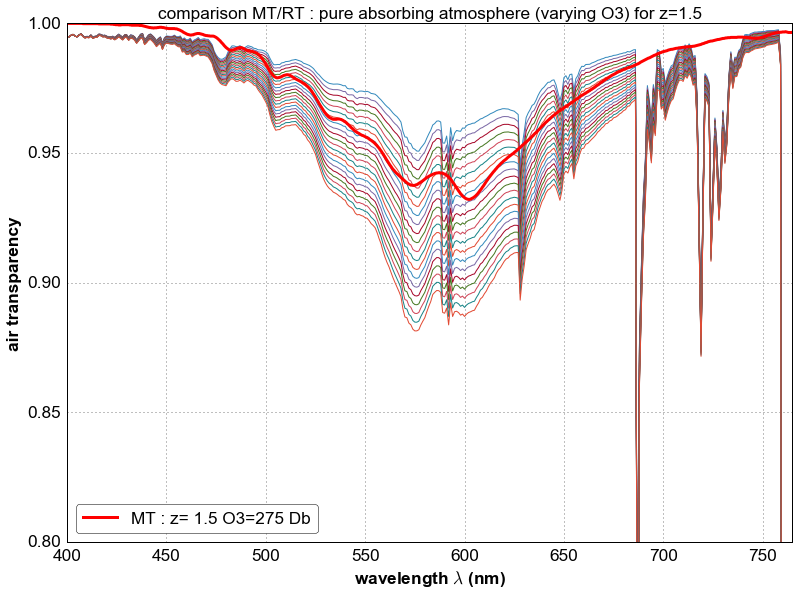

In [771]:
for idx,file in np.ndenumerate(input_filelist3):
    index=idx[0]
    x=rt_wl[:,index]
    y=rt_trans[:,index]
    plt.plot(x,y,'-')
plt.plot(x_mt,y_mt,'r-',lw=3, label ="MT : z= 1.5 O3=275 Db")
plt.title("comparison MT/RT : pure absorbing atmosphere (varying O3) for z=1.5")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency")
plt.ylim(0.8,1)
plt.xlim(OZMIN,OZMAX)
plt.legend(loc=3)

Very interesting, there is a disagrement MT/RT at the 400 nm plateau:
- ** disagreement is less than 0.5 % ** (looks like a libradtran bug)
- in LibRadtran, there seems to be still Ozone effect at short wavelength
- ratio calculation done below:


###  Going to compute the ratio

In [772]:
WLMIN=OZMIN
WLMAX=OZMAX


In [773]:
interpol_atm_mt=interp1d(x_mt,y_mt)

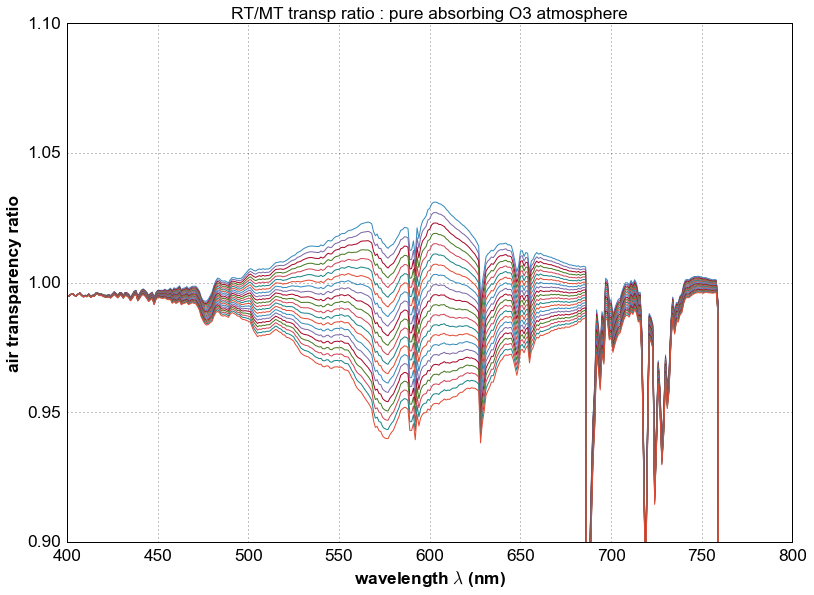

In [774]:
for idx,file in np.ndenumerate(input_filelist3):
    index=idx[0]
    x=rt_wl[:,index]
    y=rt_trans[:,index]
    indexes=np.where(np.logical_and(x>=WLMIN,x<=WLMAX))
    newx=x[indexes]
    newy=y[indexes]
    newymt=interpol_atm_mt(newx)
    ratio=newy/newymt
    plt.plot(newx,ratio,"-")
    plt.title("RT/MT transp ratio : pure absorbing O3 atmosphere")
    plt.xlabel("wavelength $\lambda$ (nm)")
    plt.ylabel("air transparency ratio")
    plt.ylim(0.90,1.1)

In [775]:
WLMINCut=500
WLMAXCut=675

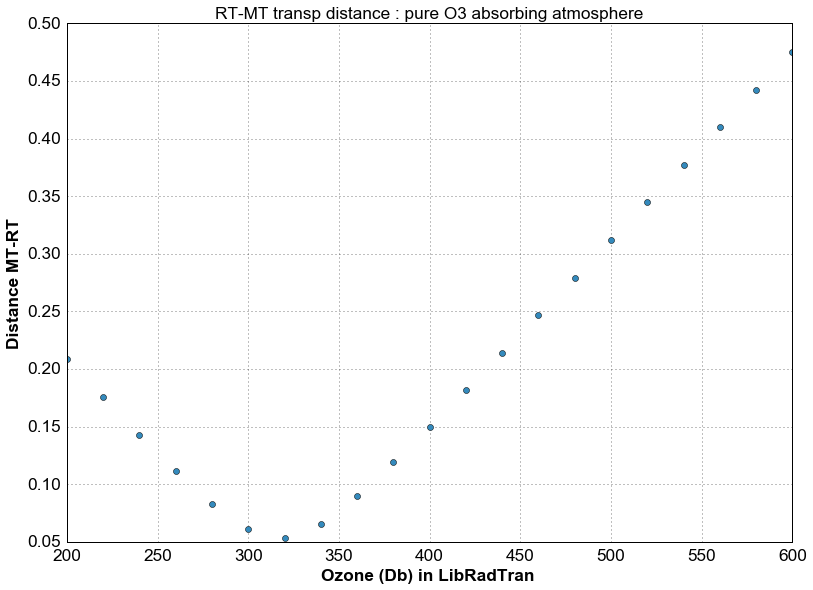

In [776]:
XX=[] ; YY=[]
for idx,file in np.ndenumerate(input_filelist3):
    index=idx[0] ; x=rt_wl[:,index] ; y=rt_trans[:,index]
    indexes=np.where(np.logical_and(x>=WLMINCut,x<=WLMAXCut)); newx=x[indexes]
    newy=y[indexes] ; newymt=interpol_atm_mt(newx)
    diff2=(newy-newymt)**2 ; thesum=np.sum(diff2)
    XX.append(rt_oz[index]) ; YY.append(np.sqrt(thesum))
XX=np.array(XX) ; YY=np.array(YY)
plt.plot(XX,YY,"o")
plt.title("RT-MT transp distance : pure O3 absorbing atmosphere")
plt.xlabel("Ozone (Db) in LibRadTran ")
plt.ylabel("Distance MT-RT")

** So Modtran ozone is compatible with $OZ= 325$ Db **

### So now compared with the selected libradtran atmosphere

In [777]:
index_min=np.where(YY==YY.min())[0]

In [778]:
print index_min

[6]


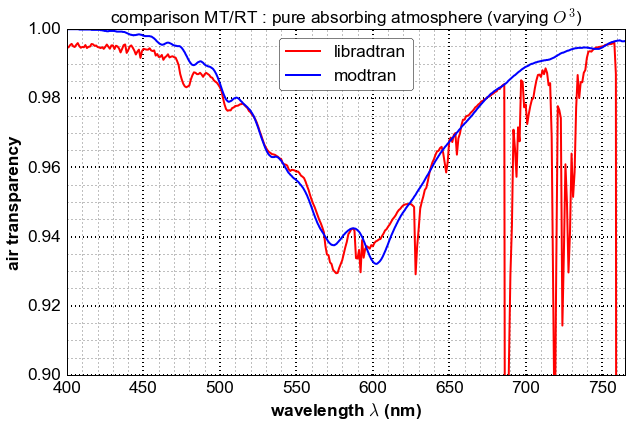

In [779]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
x=rt_wl[:,index_min] ; y=rt_trans[:,index_min]
ax.plot(x,y,'r-',lw=2,label='libradtran'); ax.plot(x_mt,y_mt,'b-',lw=2,label='modtran')
ax.set_title("comparison MT/RT : pure absorbing atmosphere (varying $O^3$)")
ax.set_xlabel("wavelength $\lambda$ (nm)") ; ax.set_ylabel("air transparency")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.set_ylim(0.9,1)
ax.set_xlim(WLMIN,WLMAX)
ax.legend(loc='best')

### So we have a small discrepancy of only  0.5% at 400 nm

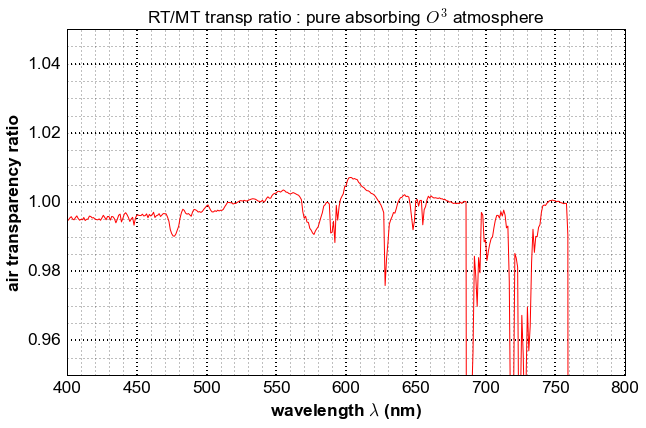

In [780]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
x=rt_wl[:,index_min] ; y=rt_trans[:,index_min]
indexes=np.where(np.logical_and(x>=WLMIN,x<=WLMAX))
newx=x[indexes] ; newy=y[indexes] ; newymt=interpol_atm_mt(newx)
ratio=newy/newymt
ax.plot(newx,ratio,"r-")
ax.set_title("RT/MT transp ratio : pure absorbing $O^3$ atmosphere")
ax.set_xlabel("wavelength $\lambda$ (nm)")
ax.set_ylabel("air transparency ratio")
ax.set_ylim(0.95,1.05)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)

### So we have a small discrepancy of only  0.5% at  $\lambda$ = 400  nm for Ozone


# 7) All, scattering and absorption

In [781]:
wl,sed=magnit.MakeSED(lambda_min=300.,lambda_max=1099.,dlambda=1.,slope=1)

In [782]:
flt=magnit.Filter()    
wl_u,u=flt.get_u_tr()
wl_g,g=flt.get_g_tr()
wl_r,r=flt.get_r_tr()
wl_i,i=flt.get_i_tr()
wl_z,z=flt.get_z_tr()
wl_y4,y4=flt.get_y4_tr()

### Modtran

In [783]:
x_mt=df6["wl"]
pwv_mt=df6["z15_pwv"]
o2_mt=df6["z15_O2"]
oz_mt=df6["z15_oz"]
sc_mt=df6["z15_sc"]
y_mt=pwv_mt*o2_mt*oz_mt*sc_mt

### LibRadTran

In [784]:
sc_rt_path=os.path.join(path_atm_rt_us_sc,'RT_LS_pp_us_sc_rt_z15.OUT')
abs_rt_pwv_path=os.path.join(path_atm_rt_us_ab_rt_pwv,'RT_LS_pp_us_ab_rt_z15_wv40.OUT')
abs_rt_oz_path=os.path.join(path_atm_rt_us_ab_rt_oz,'RT_LS_pp_us_ab_rt_z15_oz32.OUT')
sa_rt_pwv_path=os.path.join(path_atm_rt_us_sa_rt_pwv,'RT_LS_pp_us_sa_rt_z15_wv40.OUT')
sa_rt_oz_path=os.path.join(path_atm_rt_us_sa_rt_oz,'RT_LS_pp_us_sa_rt_z15_oz32.OUT')

In [785]:
data1=np.loadtxt(sc_rt_path)
data2=np.loadtxt(abs_rt_pwv_path)
data3=np.loadtxt(abs_rt_oz_path)
data4=np.loadtxt(sa_rt_pwv_path)
data5=np.loadtxt(sa_rt_oz_path)

In [786]:
x_rt_1=data1[:,0]   # pure scatering
y_rt_1=data1[:,1]

x_rt_2=data2[:,0]   # pure absorption (H2O = 4mm) 
y_rt_2=data2[:,1]

x_rt_3=data3[:,0]   # pure absorption (OZ = 320 Db) 
y_rt_3=data3[:,1]

x_rt_4=data4[:,0]   # Both absorption and scattering (H2O = 4 mm)
y_rt_4=data4[:,1]

x_rt_5=data5[:,0]   # Both absorption and scattering (OZ = 320 mm)
y_rt_5=data5[:,1]

In [787]:
y_rt_6=y_rt_1*y_rt_2
y_rt_7=y_rt_1*y_rt_3

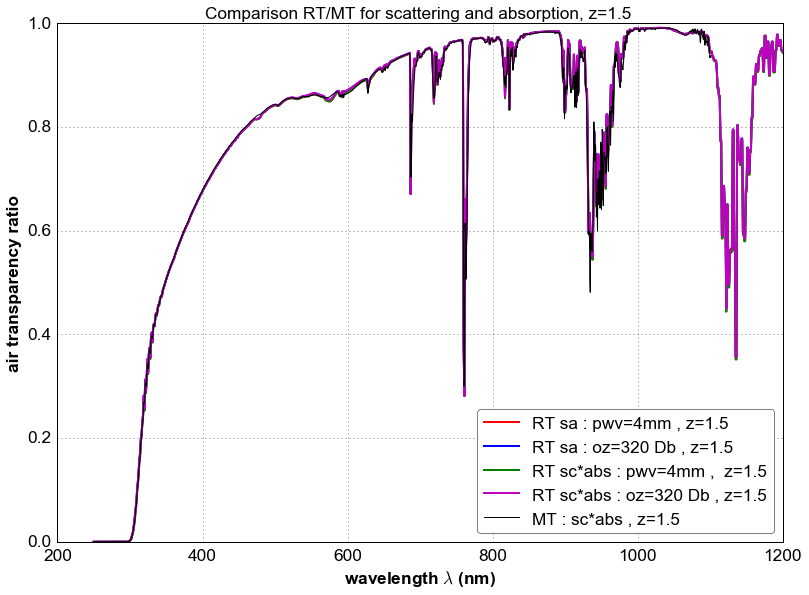

In [788]:
plt.title('Comparison RT/MT for scattering and absorption, z=1.5 ')
plt.plot(x_rt_4,y_rt_4,'r-',lw=2,label = 'RT sa : pwv=4mm , z=1.5')
plt.plot(x_rt_5,y_rt_5,'b-',lw=2,label = 'RT sa : oz=320 Db , z=1.5')
plt.plot(x_rt_1,y_rt_6,'g-',lw=2,label = 'RT sc*abs : pwv=4mm ,  z=1.5')
plt.plot(x_rt_1,y_rt_7,'m-',lw=2,label = 'RT sc*abs : oz=320 Db , z=1.5')
plt.plot(x_mt,y_mt,'k-',lw=1,label = 'MT : sc*abs , z=1.5')
plt.legend(loc=4)
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency ratio")

In [789]:
WLMIN=250
WLMAX=1099

In [790]:
interpol_atm_mt=interp1d(x_mt,y_mt)

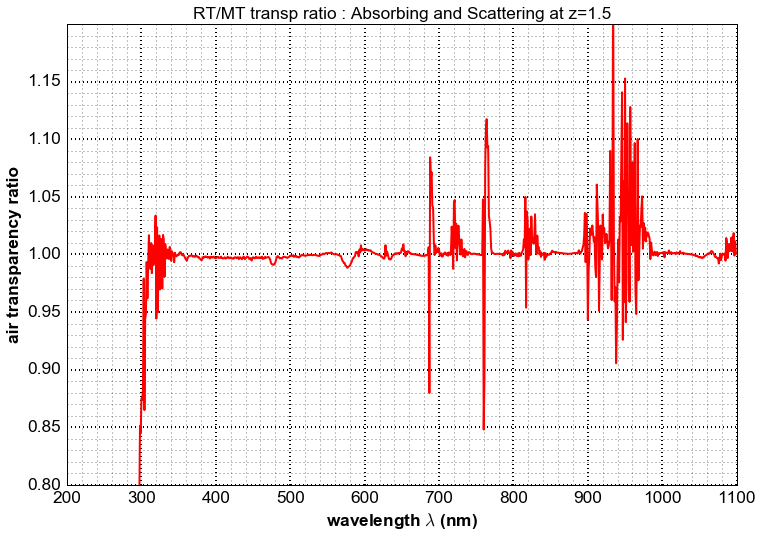

In [791]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

indexes=np.where(np.logical_and(x_rt_4>=WLMIN,x_rt_4<=WLMAX))

newx=x_rt_4[indexes] ; newy=y_rt_4[indexes] ;  # libradtran

newymt=interpol_atm_mt(newx) # modtran

ratio=newy/newymt
ax.plot(newx,ratio,"r-",lw=2)
ax.set_title("RT/MT transp ratio : Absorbing and Scattering at z=1.5")
ax.set_xlabel("wavelength $\lambda$ (nm)")
ax.set_ylabel("air transparency ratio")
ax.set_ylim(00.8,1.2)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)

## 8)

## 8) Magnitude comparison

In [838]:
exponent=-1

In [839]:
wl,sed=magnit.MakeSED(lambda_min=300.,lambda_max=1099.,dlambda=1.,slope=exponent)
sed/=10.

In [840]:
flt=magnit.Filter()    
wl_u,u=flt.get_u_tr()
wl_g,g=flt.get_g_tr()
wl_r,r=flt.get_r_tr()
wl_i,i=flt.get_i_tr()
wl_z,z=flt.get_z_tr()
wl_y4,y4=flt.get_y4_tr()

In [841]:
mag=magnit.LSST_Magnitude() 

## Modtran : Flux at CCD

In [842]:
fl1_u_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_u,u)
fl1_g_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_g,g)
fl1_r_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_r,r)
fl1_i_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_i,i)
fl1_z_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_z,z)
fl1_y4_mt=mag.ComputeSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_y4,y4)

### LibRadTran : Flux at CCD

In [843]:
fl1_u_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_u,u)
fl1_g_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_g,g)
fl1_r_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_r,r)
fl1_i_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_i,i)
fl1_z_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_z,z)
fl1_y4_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_y4,y4)

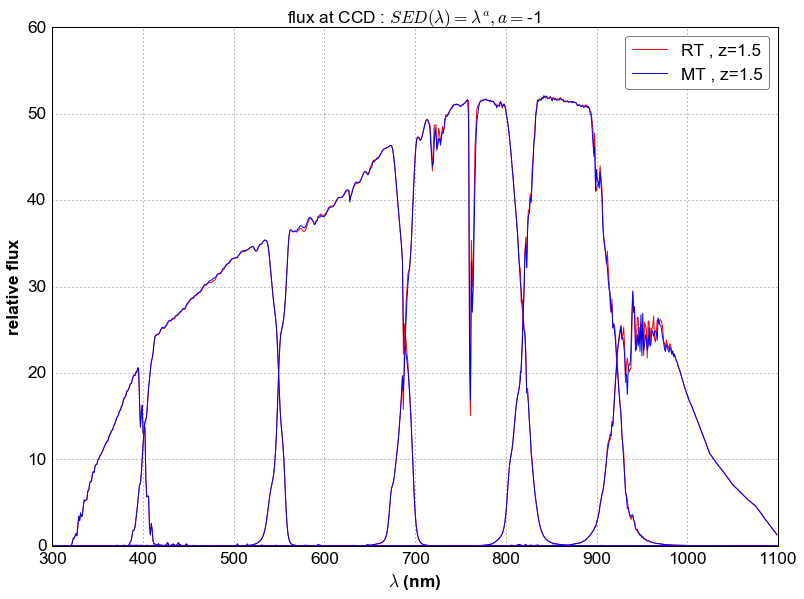

In [845]:
plt.plot(wl,fl1_u_rt,'r-',label='RT , z=1.5')
plt.plot(wl,fl1_u_mt,'b-',label='MT , z=1.5') 

plt.plot(wl,fl1_g_rt,'r-')
plt.plot(wl,fl1_g_mt,'b-')

plt.plot(wl,fl1_r_rt,'r-')
plt.plot(wl,fl1_r_mt,'b-')

plt.plot(wl,fl1_i_rt,'r-')
plt.plot(wl,fl1_i_mt,'b-')

plt.plot(wl,fl1_z_rt,'r-')
plt.plot(wl,fl1_z_mt,'b-')

plt.plot(wl,fl1_y4_rt,'r-')
plt.plot(wl,fl1_y4_mt,'b-')

thetitle = 'flux at CCD : $SED(\lambda) = \lambda^a , a= ${} '.format(exponent)
plt.title(thetitle)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('relative flux')
plt.legend(loc=1)
plt.savefig("compmagnit.jpg")

### Modtran magnitudes

In [846]:
m_fl1_u_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_u,u)
m_fl1_g_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_g,g)
m_fl1_r_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_r,r)
m_fl1_i_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_i,i)
m_fl1_z_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_z,z)
m_fl1_y4_mt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_mt,y_mt,wl_y4,y4)

### LibRadTran magnitudes

In [847]:
m_fl1_u_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_u,u)
m_fl1_g_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_g,g)
m_fl1_r_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_r,r)
m_fl1_i_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_i,i)
m_fl1_z_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_z,z)
m_fl1_y4_rt=mag.ComputeRelativeMagSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_y4,y4)

In [848]:
du=(m_fl1_u_rt - m_fl1_u_mt)*1000.
dg=(m_fl1_g_rt - m_fl1_g_mt)*1000.
dr=(m_fl1_r_rt - m_fl1_r_mt)*1000.
di=(m_fl1_i_rt - m_fl1_i_mt)*1000.
dz=(m_fl1_z_rt - m_fl1_z_mt)*1000.
dy4=(m_fl1_y4_rt - m_fl1_y4_mt)*1000.

In [849]:
print 'U(RT) - U(MT) = {:3.2f} mmag '.format(du)
print 'G(RT) - G(MT) = {:3.2f} mmag '.format(dg)
print 'R(RT) - R(MT) = {:3.2f} mmag '.format(dr)
print 'I(RT) - I(MT) = {:3.2f} mmag '.format(di)
print 'Z(RT) - Z(MT) = {:3.2f} mmag '.format(dz)
print 'Y4(RT) -Y4(MT) = {:3.2f} mmag '.format(dy4)

U(RT) - U(MT) = 2.17 mmag 
G(RT) - G(MT) = 2.52 mmag 
R(RT) - R(MT) = -0.54 mmag 
I(RT) - I(MT) = -6.95 mmag 
Z(RT) - Z(MT) = -5.54 mmag 
Y4(RT) -Y4(MT) = -12.74 mmag 
